# Story :

### Prediction of next semester cgpa is very difficult. Prediction of next semester cgpa can be done by analyzing the past performance of a student.

### Data collection :

This data has been collected manually from a website of a Technical University. Roll number has been converted to a random number for the privacy of the students. College code and subject is real and the semester cgpa is also a real world dataset.

### Solution :

Prediction of the next semester marks can be determined by using machine learning algorithms. In my point of view advance regression technique can be a good performer for this case.

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [5]:
# load dataset
sd = pd.read_csv('Data.csv')

# Data Preprocessing

In [7]:
sd.describe()

,1st,2nd,3rd,4th,5th,College Code,Roll,Roll no.,Subject Code
count,176.000000,174.000000,176.00000,173.000000,172.000000,178.000000,132.000000,46.000000,178.000000
mean,7.038864,6.943391,6.62250,7.027746,7.432558,152.983146,17040.666667,17042.500000,18.359551
std,0.859521,0.881088,0.91926,1.035675,1.068866,48.357599,13.622874,13.422618,4.782849
min,3.850000,3.900000,3.96000,4.290000,4.000000,115.000000,17017.000000,17020.000000,16.000000
25%,6.440000,6.380000,6.14000,6.330000,6.750000,115.000000,17029.000000,17031.250000,16.000000
50%,7.070000,6.800000,6.68500,7.070000,7.590000,116.000000,17040.000000,17042.500000,16.000000
75%,7.590000,7.612500,7.26000,7.860000,8.210000,165.000000,17051.000000,17053.750000,16.000000
max,9.150000,9.210000,9.59000,9.310000,9.460000,241.000000,17067.000000,17065.000000,28.000000


In [9]:
sd.isnull()

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code
0,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,True,False
174,False,False,False,False,False,False,False,False,True,False
175,False,False,False,False,False,False,False,False,True,False
176,False,False,False,False,False,False,False,False,True,False


In [76]:
sd.describe().T

,count,mean,std,min,25%,50%,75%,max
1st,176.0,7.038864,0.859521,3.85,6.44,7.070,7.5900,9.15
2nd,174.0,6.943391,0.881088,3.90,6.38,6.800,7.6125,9.21
3rd,176.0,6.622500,0.919260,3.96,6.14,6.685,7.2600,9.59
4th,173.0,7.027746,1.035675,4.29,6.33,7.070,7.8600,9.31
5th,172.0,7.432558,1.068866,4.00,6.75,7.590,8.2100,9.46
College Code,178.0,152.983146,48.357599,115.00,115.00,116.000,165.0000,241.00
Roll,132.0,17040.666667,13.622874,17017.00,17029.00,17040.000,17051.0000,17067.00
Roll no.,46.0,17042.500000,13.422618,17020.00,17031.25,17042.500,17053.7500,17065.00
Subject Code,178.0,18.359551,4.782849,16.00,16.00,16.000,16.0000,28.00


In [79]:
sd.info() # data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1st           176 non-null    float64
 1   2nd           174 non-null    float64
 2   3rd           176 non-null    float64
 3   4th           173 non-null    float64
 4   5th           172 non-null    float64
 5   College Code  178 non-null    int64  
 6   Gender        177 non-null    object 
 7   Roll          132 non-null    float64
 8   Roll no.      46 non-null     float64
 9   Subject Code  178 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 14.0+ KB


In [80]:
# A look at the gender
sd['Gender']

0      Female
1        Male
2      Female
3        Male
4        Male
        ...  
173         F
174         M
175         M
176         M
177         M
Name: Gender, Length: 178, dtype: object

In [81]:
# There are some values that are Female and some Male and others
# F and M. So in it we have to make similar values like F for female and M for Male

In [82]:
sd['Gender'].replace({'Female': 'F', 'Male': 'M'}, inplace=True)

In [83]:
sd['Gender']

0      F
1      M
2      F
3      M
4      M
      ..
173    F
174    M
175    M
176    M
177    M
Name: Gender, Length: 178, dtype: object

In [84]:
sd

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code
0,8.11,7.68,7.11,7.43,8.18,115,F,NaN,17020.0,16
1,6.48,5.90,4.15,4.29,4.96,115,M,NaN,17021.0,16
2,8.41,8.24,7.52,8.25,7.75,115,F,NaN,17022.0,16
3,7.33,6.83,6.33,6.79,6.89,115,M,NaN,17023.0,16
4,7.89,7.34,7.22,7.32,7.46,115,M,NaN,17024.0,16
...,...,...,...,...,...,...,...,...,...,...
173,7.48,7.55,7.67,7.39,8.65,241,F,17048.0,NaN,28
174,7.30,6.41,6.59,7.11,7.38,241,M,17049.0,NaN,28
175,6.30,6.28,5.89,5.71,6.50,241,M,17050.0,NaN,28
176,7.04,7.10,6.81,7.00,6.92,241,M,17051.0,NaN,28


## Handling Missing Data

In [85]:
# Number of Na in the respective columns and rows
sd.isnull().sum()

1st               2
2nd               4
3rd               2
4th               5
5th               6
College Code      0
Gender            1
Roll             46
Roll no.        132
Subject Code      0
dtype: int64

In [86]:
# Sum of subjects code
sd['Subject Code'].value_counts()

16    143
28     35
Name: Subject Code, dtype: int64

In [87]:
sd['College Code'].value_counts()

116    51
115    46
165    46
241    35
Name: College Code, dtype: int64

In [88]:
sd['Gender'].value_counts()

M    149
F     28
Name: Gender, dtype: int64

In [89]:
# Make Roll No values in the int type
sd['Roll'].fillna(0, inplace=True) # Replacing null values from 0
sd['Roll no.'].fillna(0, inplace=True)

# Replacing null values from 0

sd['Roll_no']=sd['Roll']+sd['Roll no.'] # combining two columns into one
sd.drop(columns=['Roll', 'Roll no.'], inplace=True)

In [90]:
sd['Roll_no'].astype(int)

0      17020
1      17021
2      17022
3      17023
4      17024
       ...  
173    17048
174    17049
175    17050
176    17051
177    17052
Name: Roll_no, Length: 178, dtype: int64

In [91]:
sd.isnull().sum()

1st             2
2nd             4
3rd             2
4th             5
5th             6
College Code    0
Gender          1
Subject Code    0
Roll_no         0
dtype: int64

In [92]:
sd.describe()

,1st,2nd,3rd,4th,5th,College Code,Subject Code,Roll_no
count,176.000000,174.000000,176.00000,173.000000,172.000000,178.000000,178.000000,178.000000
mean,7.038864,6.943391,6.62250,7.027746,7.432558,152.983146,18.359551,17041.140449
std,0.859521,0.881088,0.91926,1.035675,1.068866,48.357599,4.782849,13.557471
min,3.850000,3.900000,3.96000,4.290000,4.000000,115.000000,16.000000,17017.000000
25%,6.440000,6.380000,6.14000,6.330000,6.750000,115.000000,16.000000,17030.000000
50%,7.070000,6.800000,6.68500,7.070000,7.590000,116.000000,16.000000,17041.000000
75%,7.590000,7.612500,7.26000,7.860000,8.210000,165.000000,16.000000,17052.000000
max,9.150000,9.210000,9.59000,9.310000,9.460000,241.000000,28.000000,17067.000000


In [93]:
sd['1st'].mean()

7.038863636363637

In [94]:
# replacing null values from 0
sd['Gender'].fillna(0, inplace=True)

sd['1st'].fillna(sd['1st'].mean(), inplace=True)

# Replacing Null values from 0
sd['2nd'].fillna(sd['2nd'].mean(), inplace=True)
# Replacing Null values from
sd['3rd'].fillna(sd['3rd'].mean(), inplace=True)
# Replacing Null values from
sd['4th'].fillna(sd['4th'].mean(), inplace=True)
# Replacing Null values from
sd['5th'].fillna(sd['5th'].mean(), inplace=True)

In [95]:
sd.isnull().sum()

1st             0
2nd             0
3rd             0
4th             0
5th             0
College Code    0
Gender          0
Subject Code    0
Roll_no         0
dtype: int64

## Combining college code, subject code and roll_no column together

In [96]:
sd['College Code'] = sd['College Code'].astype(str)
sd['Subject Code'] = sd['Subject Code'].astype(str)
sd['Roll_no'] = sd['Roll_no'].astype(str)
sd['studentid'] = sd['College Code']+sd['Subject Code']+sd['Roll_no']

In [97]:
sd['studentid']

0      1151617020.0
1      1151617021.0
2      1151617022.0
3      1151617023.0
4      1151617024.0
           ...     
173    2412817048.0
174    2412817049.0
175    2412817050.0
176    2412817051.0
177    2412817052.0
Name: studentid, Length: 178, dtype: object

In [98]:
sd

,1st,2nd,3rd,4th,5th,College Code,Gender,Subject Code,Roll_no,studentid
0,8.11,7.68,7.11,7.43,8.18,115,F,16,17020.0,1151617020.0
1,6.48,5.90,4.15,4.29,4.96,115,M,16,17021.0,1151617021.0
2,8.41,8.24,7.52,8.25,7.75,115,F,16,17022.0,1151617022.0
3,7.33,6.83,6.33,6.79,6.89,115,M,16,17023.0,1151617023.0
4,7.89,7.34,7.22,7.32,7.46,115,M,16,17024.0,1151617024.0
...,...,...,...,...,...,...,...,...,...,...
173,7.48,7.55,7.67,7.39,8.65,241,F,28,17048.0,2412817048.0
174,7.30,6.41,6.59,7.11,7.38,241,M,28,17049.0,2412817049.0
175,6.30,6.28,5.89,5.71,6.50,241,M,28,17050.0,2412817050.0
176,7.04,7.10,6.81,7.00,6.92,241,M,28,17051.0,2412817051.0


In [101]:
#sd.drop(columns=['Subject Code', 'Roll_no'], inplace=True)

## Visualisation

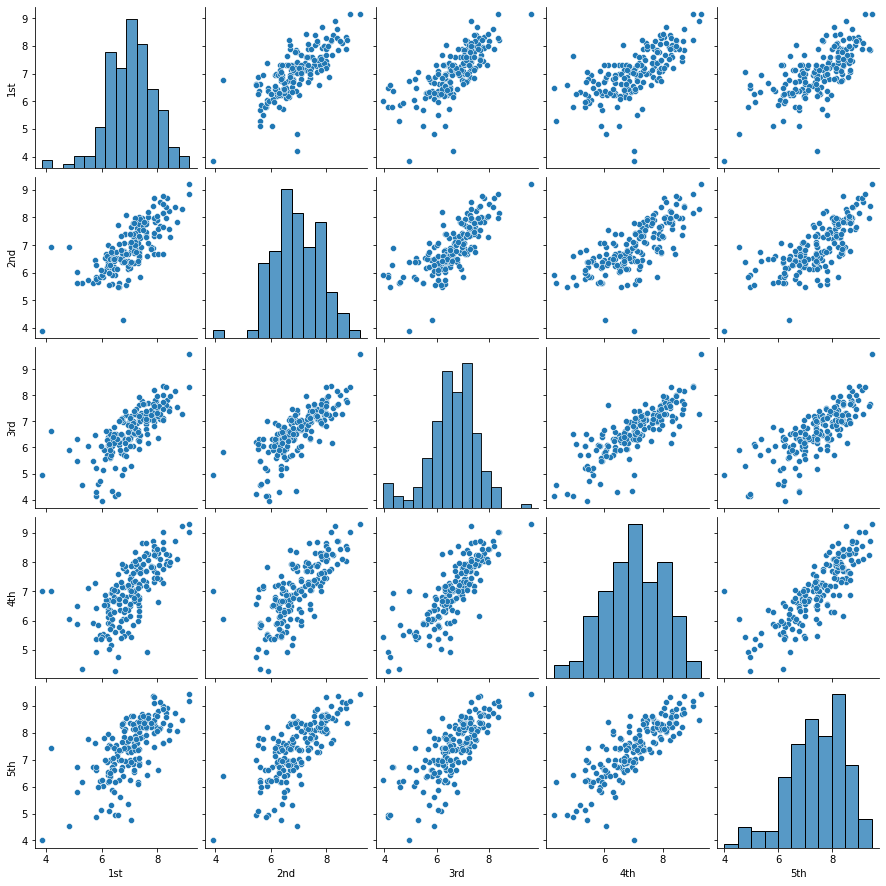

In [102]:
# Pair plot of correlation

sns.pairplot(sd)

In [103]:
sd

,1st,2nd,3rd,4th,5th,College Code,Gender,studentid
0,8.11,7.68,7.11,7.43,8.18,115,F,1151617020.0
1,6.48,5.90,4.15,4.29,4.96,115,M,1151617021.0
2,8.41,8.24,7.52,8.25,7.75,115,F,1151617022.0
3,7.33,6.83,6.33,6.79,6.89,115,M,1151617023.0
4,7.89,7.34,7.22,7.32,7.46,115,M,1151617024.0
...,...,...,...,...,...,...,...,...
173,7.48,7.55,7.67,7.39,8.65,241,F,2412817048.0
174,7.30,6.41,6.59,7.11,7.38,241,M,2412817049.0
175,6.30,6.28,5.89,5.71,6.50,241,M,2412817050.0
176,7.04,7.10,6.81,7.00,6.92,241,M,2412817051.0


In [104]:
sd1 = sd[['1st', '2nd', '3rd', '4th', '5th']]

In [105]:
sd1

,1st,2nd,3rd,4th,5th
0,8.11,7.68,7.11,7.43,8.18
1,6.48,5.90,4.15,4.29,4.96
2,8.41,8.24,7.52,8.25,7.75
3,7.33,6.83,6.33,6.79,6.89
4,7.89,7.34,7.22,7.32,7.46
...,...,...,...,...,...
173,7.48,7.55,7.67,7.39,8.65
174,7.30,6.41,6.59,7.11,7.38
175,6.30,6.28,5.89,5.71,6.50
176,7.04,7.10,6.81,7.00,6.92


In [107]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=21)

In [109]:
X

array([[7.68, 7.11, 7.43, 8.18],
       [5.9 , 4.15, 4.29, 4.96],
       [8.24, 7.52, 8.25, 7.75],
       [6.83, 6.33, 6.79, 6.89],
       [7.34, 7.22, 7.32, 7.46],
       [6.72, 6.48, 6.5 , 7.39],
       [6.72, 6.89, 6.86, 7.64],
       [6.38, 4.93, 5.64, 6.75],
       [7.45, 6.96, 7.71, 8.  ],
       [6.34, 6.3 , 6.61, 6.18],
       [7.9 , 7.52, 7.64, 8.11],
       [4.28, 5.81, 6.04, 6.39],
       [5.62, 5.48, 5.93, 6.75],
       [6.41, 6.41, 6.93, 7.  ],
       [6.21, 6.19, 6.68, 6.86],
       [6.17, 5.59, 5.89, 6.36],
       [6.14, 6.93, 7.18, 7.29],
       [6.45, 5.78, 6.  , 6.61],
       [6.93, 7.33, 7.71, 8.46],
       [6.31, 6.44, 7.21, 7.32],
       [5.62, 6.11, 5.79, 6.25],
       [8.72, 7.81, 8.04, 8.93],
       [7.93, 7.78, 8.21, 8.21],
       [5.55, 5.93, 6.79, 7.54],
       [8.17, 7.15, 7.75, 7.64],
       [6.69, 7.15, 8.43, 8.36],
       [6.55, 5.96, 6.75, 6.89],
       [8.17, 8.37, 9.04, 9.  ],
       [7.59, 7.26, 7.89, 7.86],
       [6.45, 6.48, 7.29, 7.61],
       [6.

# Train Using Multiple Linear Regression

In [72]:
X = sd.iloc[:, 1 :-5].values
y = sd.iloc[:, -6].values


In [62]:
for i in y:
    print(y[0])
    break
#print(y)

8.18


In [63]:
for j in X:
    print(X[0])
    break

[7.68 7.11 7.43 8.18]


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [65]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').